![title](logo-utn.png)

## *Fundamentos de la Robótica Móvil.*
### Trabajo Practico N°1: Modelo cinemático y odometría en robot de tracción diferencial.

***

### Integrantes: 
- Sanchez Marengo Nahuel
- Toth Lautaro
- Traverso Osses Facundo

### Objetivo

Comprender el modelo cinemático y la estimación de pose (posición y orientación) mediante el cálculo de odometría de un robot con ruedas de tracción diferencial que se mueve sobre una superficie plana, utilizando para ello el simulador Gazebo.

# Actividad 1
***
## Consigna:

Determinar de forma analítica el radio del camino circular que realiza el robot al ajustar la velocidad lineal y angular a valores constantes. Realizar el calculo para dos velocidades cualesquiera teniendo en cuenta las velocidades máximas del robot.

*Nota: Los límites de velocidad y los parámetros cinemáticos (el radio de la rueda R y la 
distancia entre ruedas b) de los diferentes modelos del robot TurtleBot3 se obtienen de las 
especificaciones (link). Para el robot RoMAA considerar una velocidad máxima de rueda de 2 
m/s con R = 0,140 m y b = 0,450 m.

***

El modelo cinemático de robot de tracción diferencial usado en este trabajo es el siguiente:

![title](referencias_robot.png)

donde:

- $v$: velocidad lineal del centro odométrico [$m/s$] 
- $\omega$: velocidad angular del centro odométrico [$rad/s$]

El tiempo que tardará el robot en completar una vuelta completa será:

$$t_{vuelta} = \frac{2\pi}{\omega}$$

Mientras que el perímetro camino circular resultante viene dado por:

$$perimetro = t_{vuelta} \cdot v = \frac{2\pi}{\omega} \cdot v$$

Expresión a partir de la cual se puede despejar el radio del círculo $R_c$

\begin{equation}
    R_c = \frac{perimetro}{2\pi} = \frac{v}{\omega}  \quad \Rightarrow \quad \boxed{R_c=\frac{v}{\omega}[m]}
\end{equation}

Valuando la ecuación anterior para $v=0.2m/s$ y $\omega=0.2rad/s$ (valores alcanzables para el robot RoMAA), se obtiene:

$$ R_c=\frac{v}{\omega} = \frac{0,2 m/s}{0,2rad/s} = 1m $$


In [1]:
v = 0.2 #en m/s
w = 0.2 #en rad/s
Rc = v/w #en m

print('Rc = ' + str(Rc) + 'm') 

Rc = 1.0m


# Actividad 2
***
## Consigna:
Calcular la velocidad lineal y angular para que el robot realice un camino circular con un radio a elección entre 0,5m y 1,5m.
***

Eligiendo un radio $R_c=1m$ y fijando una velocidad lineal $v=1m/s$, se obtiene la velocidad angular necesaria:

In [2]:
Rc = 0.5; v = 1

w = v/Rc
print('w = ' + str(w) + 'rad/s') 

w = 2.0rad/s


# Actividad 3
***
## Consigna:
Calcular las velocidades lineales y angulares de las ruedas (izquierda y derecha) del robot para el camino circular del punto anterior.
***

Las velocidades lineales y angulares para cada una de las ruedas de un robot de tracción diferencial, vienen dadas por las siguientes ecuaciones:

$$
    v = R \left( \frac{\omega_R+\omega_L}{2} \right), \quad \quad w = R \left( \frac{\omega_R-\omega_L}{b} \right)
$$

donde:

- $R$: radio de la rueda [m] 
- $b$: distancia entre ruedas [m]
- $v_R$ y $v_L$: velocidad lineal de la rueda (izquierda y derecha respectivamente)
- $\omega_R$ y $\omega_L$: velocidad angular de la rueda (izquierda y derecha respectivamente)

Teniendo en cuenta que $v=R\cdot\omega$, se reescriben de forma matricial las ecuaciones antes presentadas:

$$
\begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{b} & -\frac{1}{b} \end{bmatrix} \cdot \begin{bmatrix} v_R \\ v_L \end{bmatrix}=\begin{bmatrix} v \\ \omega \end{bmatrix}
$$

Resolviendo el sistema de ecuaciones y valuando para $v$ y $\omega$ determinadas, se pueden calcular las velocidades de cada rueda:


In [9]:
import numpy as np
v = 1
w = 2
R = 0.140
b = 0.450

coeff = np.array([[1/2, 1/2], [1/b, -1/b]])    #matrix de coefficientes
depen = np.array([v, w])                       #matriz de parámetros independientes
(vr, vl) = np.linalg.solve(coeff, depen)

wr = vr/R
wl = vl/R

print('vr = ' + str(vr) + 'm/s' )
print('vl = ' + str(vl) + 'm/s' )
print('wr = ' + str(wr) + 'rad/s' )
print('wl = ' + str(wl) + 'rad/s' )


vr = 1.45m/s
vl = 0.55m/s
wr = 10.357142857142856rad/s
wl = 3.9285714285714284rad/s


# Actividad 4
***
## Consigna:
Obtener un registro de datos con el robot en movimiento mediante teleoperación por teclado. Para guardar los datos generados por el script hay que redireccionar la salida a un archivo como:

./dump_odom.py > log.txt

Dentro del IDE de ROSDS hay una opción que permite descargar un archivo del proyecto.

***

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import io
import math

pd.set_option('display.max_rows', 4) 

file_key = 'log-aleatorio.txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True )
df.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 



# Actividad 5
***
## Consigna:
Escribir un script en Python que cargue los datos del archivo de log y genere gráficos de:
- El camino seguido por el robot.
- La trayectoria (pose respecto al tiempo).
- La velocidad del robot respecto al tiempo.

*Nota: Utilizar una relación de aspecto 1:1 para el gráfico del camino.

***

Para poder definir el camino del robot, es necesario definir marcos de referencia, tal como se muestra en la figura siguiente:

![title](referencias_robot_2.png)


donde:

- $x$ e $y$ son las coordenadas del centro odométrico respecto del marco de referencia global
- $\theta$ es el ángulo del marco de referencia del robot respecto al marco global.

A continuación, se grafica el camino aleatorio seguido por el robot, a través de la teleoperación por teclado.

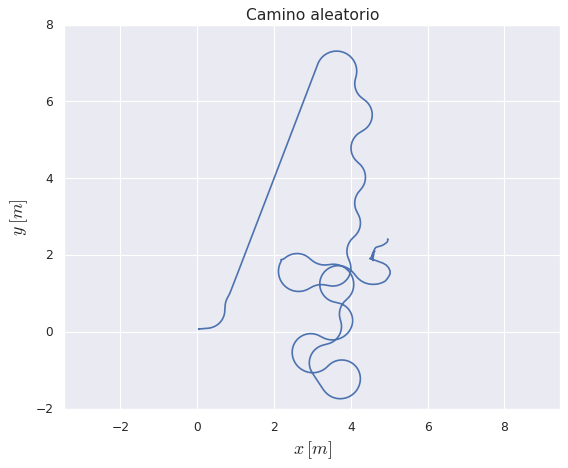

In [11]:
import seaborn as sns

plt.style.use('classic')
sns.set()

plt.axis('equal')
sns.lineplot(data=df, x="posX", y="posY",sort=False)
plt.title("Camino aleatorio", fontsize=14)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)
plt.show()


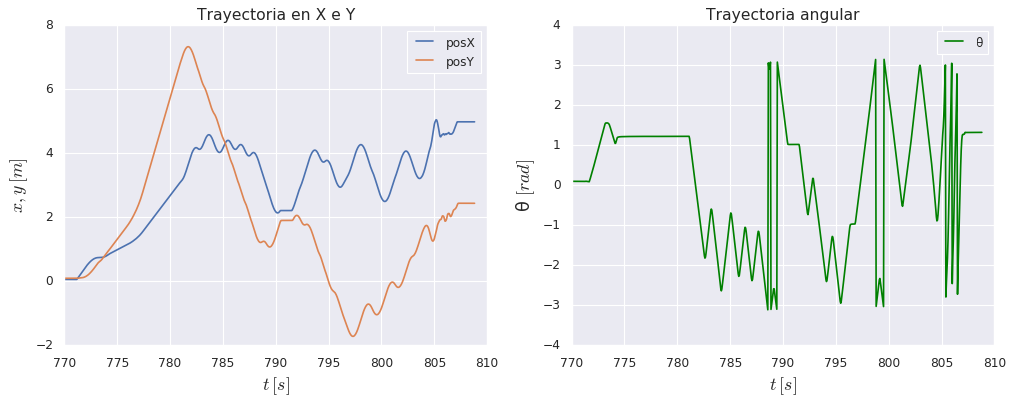

In [12]:

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Trayectoria en X e Y", fontsize=14)
sns.lineplot(data=df[323:1100], x = "time", y = "posX", label = 'posX')
sns.lineplot(data=df[323:1100], x = "time", y = "posY", label = 'posY')
plt.xlabel("$t\:[s]$", fontsize=16)
plt.ylabel("$x, y\:[m]$", fontsize=16)
#ax2= plt.twinx()
plt.subplot(122)
plt.title("Trayectoria angular", fontsize=14)
sns.lineplot(data=df[323:1100], x = "time", y = "angle", label = "θ", color='green')
plt.xlabel("$t\:[s]$", fontsize=16)
plt.ylabel("θ $[rad]$", fontsize=16)
plt.show()

Grafico de velocidad

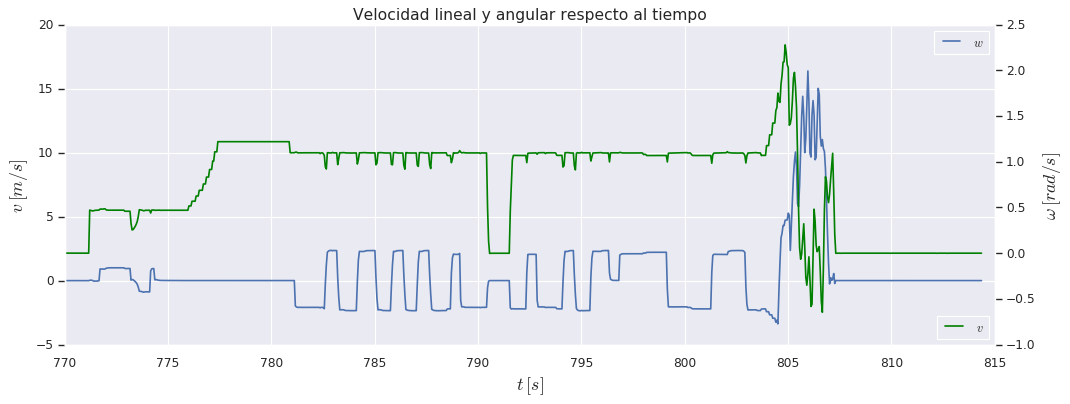

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df[323:],x='time', y='velAngular', label='$w$')
plt.xlabel("$t\:[s]$", fontsize=16)
plt.ylabel("$v\:[m/s]$", fontsize=16)
ax2= plt.twinx()

sns.lineplot(data=df[323:],x='time', y='vel',  ax=ax2, color="green", label='$v$')
plt.grid(False)
plt.legend(['$v$'], loc='lower right')
plt.ylabel("$\omega\:[rad/s]$", fontsize=16)

plt.title("Velocidad lineal y angular respecto al tiempo", fontsize=14)
plt.show()

# Actividad 6
***
## Consigna:
Obtener otro registro de datos para un camino circular del robot y graficar el camino y la trayectoria.

A partir del simulador, se obtiene otro registro de datos, pero esta vez para un camino circular. Dicho camino se genera a partir de una  𝑣=0.2𝑚/𝑠  y una  𝜔=0.2𝑟𝑎𝑑/𝑠
***


In [14]:
import io

pd.set_option('display.max_rows', 4) 

file_key = 'log-circ.txt'
df = pd.read_csv(file_key, header = None, delim_whitespace=True )
df.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 


#ajustes para que el tiempo y las posiciones iniciales sean 0
df['time'] = df['time'] - df['time'][0]
df['posX'] = df['posX'] - df['posX'][0]
df['posY'] = df['posY'] - df['posY'][0]

Una vez cargados los datos, se grafica el camino circular y se verifica que el radio obtenido es de 1m, tal como se calculó en la Actividad 1.

Además, con flechas se marcan 3 puntos en el camino seguido. El inicio y el ángulo de la flecha indican la pose instantánea del robot, mientras que su longitud es proporcional a su velocidad instantánea.

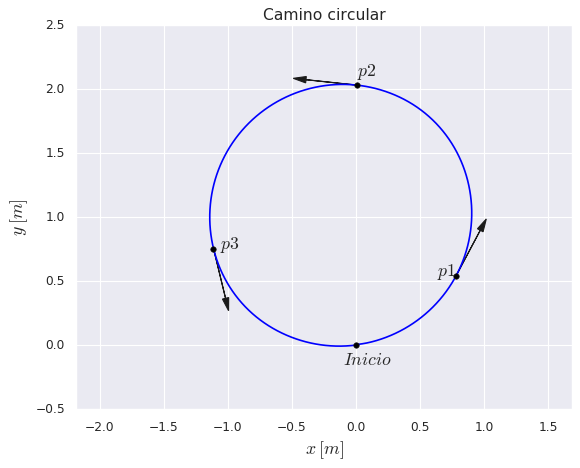

In [15]:
import seaborn as sns
import math

plt.axis('equal')
sns.lineplot(data = df[:649], x="posX", y="posY", sort=False, color="blue")

index_p1 = 100
index_p2 = 300
index_p3 = 500

scale = 2

# Se obtienen los datos para cada punto determinado por index_pi
(p1_time, p1_posX, p1_posY, p1_angle, p1_vel, p1_velAngular) = df.loc[index_p1, :].values.flatten().tolist()
p1_deltaX = p1_vel*scale*math.cos(p1_angle)
p1_deltaY = p1_vel*scale*math.sin(p1_angle)

(p2_time, p2_posX, p2_posY, p2_angle, p2_vel, p2_velAngular) = df.loc[index_p2, :].values.flatten().tolist()
p2_deltaX = p2_vel*scale*math.cos(p2_angle)
p2_deltaY = p2_vel*scale*math.sin(p2_angle)

(p3_time, p3_posX, p3_posY, p3_angle, p3_vel, p3_velAngular) = df.loc[index_p3, :].values.flatten().tolist()
p3_deltaX = p3_vel*scale*math.cos(p3_angle)
p3_deltaY = p3_vel*scale*math.sin(p3_angle)

# Plotea flechas
plt.arrow(p1_posX, p1_posY, p1_deltaX, p1_deltaY, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(p2_posX, p2_posY, p2_deltaX, p2_deltaY, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(p3_posX, p3_posY, p3_deltaX, p3_deltaY, head_width=0.05, head_length=0.1, fc='k', ec='k')

#Plotea puntos
plt.plot(p1_posX, p1_posY, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p2_posX, p2_posY, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p3_posX, p3_posY, marker="o", markersize=5, markerfacecolor="black")
plt.plot(0, 0, marker="o", markersize=5, markerfacecolor="black")

#Plotea texto
plt.text(p1_posX-0.15, p1_posY, '$p1$', fontsize = 16)
plt.text(p2_posX, p2_posY+0.08, '$p2$', fontsize = 16)
plt.text(p3_posX+0.05, p3_posY, '$p3$', fontsize = 16)
plt.text(-0.1, -0.15, '$Inicio$', fontsize = 16)

plt.title("Camino circular", fontsize=14)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)

plt.show()


A continuación se grafica la trayectoria seguida por el robot. Los mismos 3 puntos anteriormente marcados en el camino, son ahora indicados en el gráfico de la trayectoria.

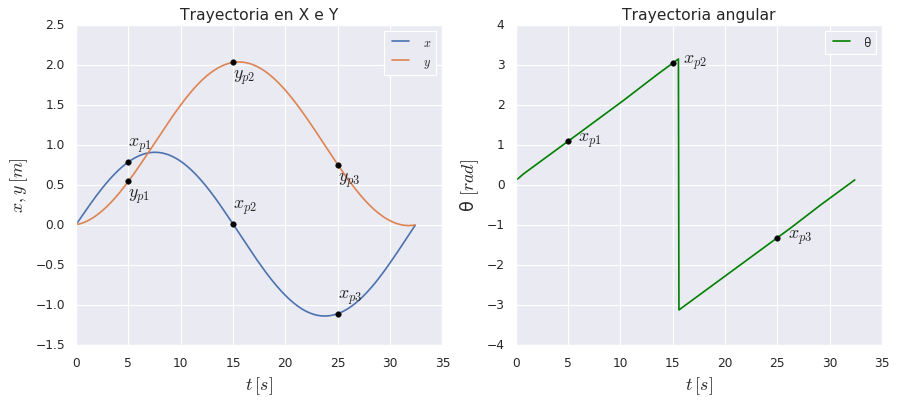

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(121)

sns.lineplot(data=df[:649], x="time", y=("posX"), label='$x$')
sns.lineplot(data=df[:649], x="time", y=("posY"), label='$y$')
plt.title("Trayectoria en X e Y", fontsize=14)
# Plotea puntos y texto en la trayectoria X Y
plt.plot(p1_time, p1_posX, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p1_time, p1_posY, marker="o", markersize=5, markerfacecolor="black")
plt.text(p1_time, p1_posX+0.2, '$x_{p1}$', fontsize = 16)
plt.text(p1_time, p1_posY-0.2, '$y_{p1}$', fontsize = 16)

plt.plot(p2_time, p2_posX, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p2_time, p2_posY, marker="o", markersize=5, markerfacecolor="black")
plt.text(p2_time, p2_posX+0.2, '$x_{p2}$', fontsize = 16)
plt.text(p2_time, p2_posY-0.2, '$y_{p2}$', fontsize = 16)

plt.plot(p3_time, p3_posX, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p3_time, p3_posY, marker="o", markersize=5, markerfacecolor="black")
plt.xlabel("$t\:[s]$", fontsize=16)
plt.ylabel("$x, y\:[m]$", fontsize=16)
plt.text(p3_time, p3_posX+0.2, '$x_{p3}$', fontsize = 16)
plt.text(p3_time, p3_posY-0.2, '$y_{p3}$', fontsize = 16)

plt.subplot(122)
sns.lineplot(data=df[:649], x="time", y="angle", color="green",label='θ')
plt.title("Trayectoria angular", fontsize=14)
# Plotea puntos y texto en la trayectoria angular
plt.plot(p1_time, p1_angle, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p2_time, p2_angle, marker="o", markersize=5, markerfacecolor="black")
plt.plot(p3_time, p3_angle, marker="o", markersize=5, markerfacecolor="black")
plt.text(p1_time+1, p1_angle, '$x_{p1}$', fontsize = 16)
plt.text(p2_time+1, p2_angle, '$x_{p2}$', fontsize = 16)
plt.text(p3_time+1, p3_angle, '$x_{p3}$', fontsize = 16)
plt.xlabel("$t\:[s]$", fontsize=16)
plt.ylabel("θ $[rad]$", fontsize=16)

plt.show()

# Actividad 10
***
## Consigna:
Obtener diferentes registros y gráficos para caminos circulares con diferentes valores (positivos y
negativos) de velocidades lineales y angulares (utilizar todas las combinaciones de signos posibles).
Indicar en los gráficos el sentido de avance del robot.
***

A continuación, se analiza el camino seguido por el robot para las 4 combinaciones posibles de signos de velocidad lineal $v$ y velocidad angular $w$

Las gráficas se presentan en la figura siguiente, y se concluye que para el robot RoMAA-II:

- $v > 0$ y $\omega > 0$: sentido de giro antihorario
- $v < 0$ y $\omega > 0$: sentido de giro antihorario
- $v < 0$ y $\omega < 0$: sentido de giro horario
- $v > 0$ y $\omega < 0$: sentido de giro horario


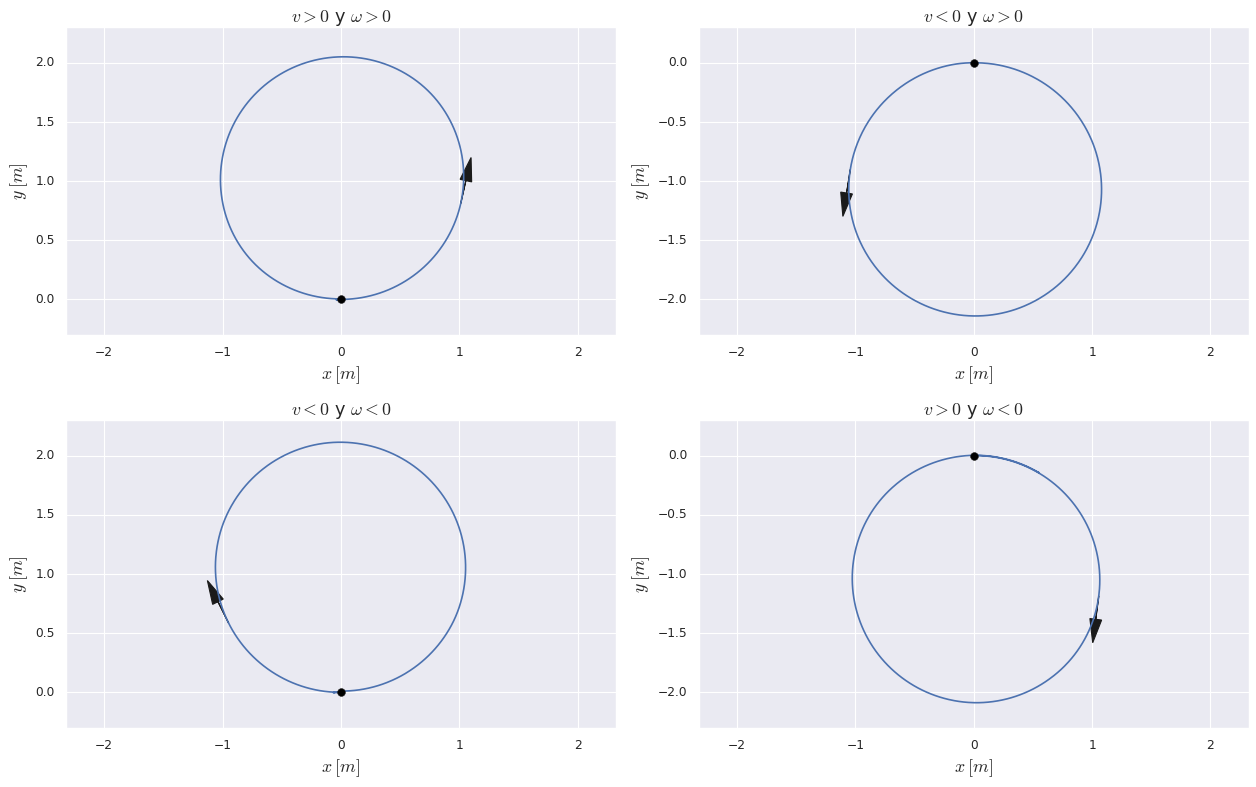

In [17]:
plt.figure(figsize=(16,10))
# -------------------------------------------
# para 0,2 ; 0,2
plt.subplot(221)
file_key= 'log10-1.txt'
df3 = pd.read_csv(file_key, header = None, delim_whitespace=True )
df3.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 
df3['time']=df3['time']-df3['time'][0]
plt.style.use('classic')
sns.set()
plt.ylim([-2.5,0.5])
plt.axis('equal')
sns.lineplot(data=df3[:808], x="posX", y="posY",sort=False)
plt.title(r"$v > 0$ y $\omega > 0$", fontsize=16)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)

# Plotea flechas de dirección y punto de inicio
(p1_time, p1_posX, p1_posY, p1_angle, p1_vel, p1_velAngular) = df3.loc[300, :].values.flatten().tolist()
p1_deltaX = p1_vel*1*math.cos(p1_angle)
p1_deltaY = p1_vel*1*math.sin(p1_angle)
plt.arrow(p1_posX, p1_posY, p1_deltaX, p1_deltaY, head_width=0.1, head_length=0.2, fc='k', ec='k')
plt.plot(0, 0, marker="o", markersize=7, markerfacecolor="black")


# -------------------------------------------
#para -0,2 ; 0,2
plt.subplot(222)
file_key = 'log10-2.txt'
df4 = pd.read_csv(file_key, header = None, delim_whitespace=True )
df4.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 
df4['time']=df4['time']-df4['time'][0]
plt.style.use('classic')
sns.set()
plt.axis('equal')
plt.ylim([-2.5,0.5])
sns.lineplot(data=df4[:820], x="posX", y="posY",sort=False)
plt.title(r"$v < 0$ y $\omega>0$", fontsize=16)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)


# Plotea flechas de dirección  y punto de inicio
(p1_time, p1_posX, p1_posY, p1_angle, p1_vel, p1_velAngular) = df4.loc[300, :].values.flatten().tolist()
p1_deltaX = p1_vel*1*math.cos(p1_angle)
p1_deltaY = p1_vel*1*math.sin(p1_angle)
plt.arrow(p1_posX, p1_posY, p1_deltaX, p1_deltaY, head_width=0.1, head_length=0.2, fc='k', ec='k')
plt.plot(0, 0, marker="o", markersize=7, markerfacecolor="black")


# -------------------------------------------
#para -0,2 ; -0,2
plt.subplot(223)
file_key = 'log10-3.txt'
df5 = pd.read_csv(file_key, header = None, delim_whitespace=True )
df5.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 
df5['time']=df5['time']-df5['time'][0]
plt.style.use('classic')
sns.set()
plt.axis('equal')
#plt.ylim([-2.5,0.5])
sns.lineplot(data=df5[:842], x="posX", y="posY",sort=False)
plt.title(r"$v < 0$ y $\omega < 0$", fontsize=16)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)

# Plotea flechas de dirección  y punto de inicio
(p1_time, p1_posX, p1_posY, p1_angle, p1_vel, p1_velAngular) = df5.loc[300, :].values.flatten().tolist()
p1_deltaX = p1_vel*1*math.cos(p1_angle)
p1_deltaY = p1_vel*1*math.sin(p1_angle)
plt.arrow(p1_posX, p1_posY, p1_deltaX, p1_deltaY, head_width=0.1, head_length=0.2, fc='k', ec='k')
plt.plot(0, 0, marker="o", markersize=7, markerfacecolor="black")

# -------------------------------------------
#para 0,2 ; -0,2
plt.subplot(224)
file_key = 'log10-4.txt'
df6 = pd.read_csv(file_key, header = None, delim_whitespace=True )
df6.columns =['time', 'posX', 'posY', 'angle', 'vel', 'velAngular'] 
df6['time']=df6['time']-df6['time'][0]
plt.style.use('classic')
sns.set()
plt.axis('equal')
plt.ylim([-2.5,0.5])
sns.lineplot(data=df6, x="posX", y="posY",sort=False)
plt.title(r"$v > 0$ y $\omega < 0$", fontsize=16)
plt.xlabel("$x\:[m]$", fontsize=16)
plt.ylabel("$y\:[m]$", fontsize=16)

# Plotea flechas de dirección  y punto de inicio
(p1_time, p1_posX, p1_posY, p1_angle, p1_vel, p1_velAngular) = df6.loc[300, :].values.flatten().tolist()
p1_deltaX = p1_vel*1*math.cos(p1_angle)
p1_deltaY = p1_vel*1*math.sin(p1_angle)
plt.arrow(p1_posX, p1_posY, p1_deltaX, p1_deltaY, head_width=0.1, head_length=0.2, fc='k', ec='k')
plt.plot(0, 0, marker="o", markersize=7, markerfacecolor="black")

plt.tight_layout()


# Actividad 11
***
## Consigna:
Se desea obtener la secuencia de comandos que deben ser enviados al robot para obtener el siguiente camino:

![title](imagen.png)
***


Antes de comenzar con la problemática, analizamos las formas posibles de resolver teniendo en cuenta las posibilidades y las limitaciones que nos presenta el modelo. En este caso se nos presentaba un robot cuya movilidad depende de dos motores DC no un paso a paso, lo cual limitaba la posibilidad de contar los pasos para medir su movimiento lineal y angular. Se nos ocurrió entonces controlarlo por tiempo, donde percibimos que de este modo sería impreciso su movimiento debido a cuestiones físicas de los circuitos que lo componen (como el tiempo de aceleración, el tiempo de reacción, etc). Entonces en el caso de no necesitar un tiempo límite para realizar el recorrido, la mejor forma para que las distancias se acercaran lo más posible a lo que se estaba solicitando, era disminuir la velocidad para que pudiéramos poner una mayor cantidad de segundos entre cada orden, y de este modo el impacto de estas imperfecciones disminuye. De todas maneras, una vez aclarado lo anterior, por motivos prácticos utilizamos unas velocidades que creímos más prácticas para la situación.

Para este ejercicio suponemos que el robot se encuentra en el punto A (en la parte inferior izquierda). Se le dará una velocidad lineal cte de 0,2 m/s durante 1,2m, por lo que debemos mantener la velocidad lineal cte de 0,2 m/s y la angular de 0 m/s durante 6 seg. Se le da una velocidad lineal baja para minimizar el error producido por el tiempo de respuesta del robot.

![title](grafico-a11.jpeg)

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0]

Luego, cuando el robot llega el punto B, se mantiene la velocidad lineal de 0,2 m/s y teniendo el cuenta el valor del radio igual a 0,4m se calcula la velocidad angular cte:

In [19]:
Rc = 0.4; v = 0.2

w = v/Rc
print('w = ' + str(w) + 'rad/s') 

w = 0.5rad/s


In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0.5]

Cuando el robot llega al punto C, se mantiene la velocidad lineal y se anula la velocidad angular durante 1,2m.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0]

Una vez que el robot llega al punto D, se mantiene la velocidad lineal constante y se le agrega nuevamente una velocidad angular de 0,5 m/s.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0.5]

Cuando llegamos al punto E, continuamos con velocidad lineal y cortamos la velocidad angular.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0]

In [ ]:
Repetimos el proceso al llegar al punto F, velocidad lineal cte de 0,2 m/s y la angular es cte de 0,5 m/s.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0.5]

Como sabemos, cuando el robot llegue al punto G, se debera anular la velocidad angular y mantener cte en 0,2 m/s la velocidad lineal.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0]

Una vez que el robot llegue al punto H, luego de los 6 segundos que tarda en hacer los 1,2m rectos, se realiza el ultimo giro.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0.2,0,0] [0,0,0.5]

Por ultimo, cuando el robot se encuentre en el punto de origen A, se le quitara las velocidades lineales y angulares, para detenerlo.

In [ ]:
rostopic pub -1 /cmd_vel geometry_msgs/Twist [0,0,0] [0,0,0]

## Conclusión

Gracias a la resolución de este informe se pudo comprender distintos conceptos sobre cinemática y odometría referida a los robots, así como también, la familiarización con el entorno ROS, el simulador Gazebo y la metodología de trabajo con Jupyter Notebook. Además, se realizaron análisis exhaustivos sobre las distintas gráficas obtenidas en todas las actividades a lo largo del trabajo práctico, y en base a ellas poder obtener una comprensión mayor sobre los distintos determinantes de los modelados de un robot, como es el caso de la posición, caminos, velocidad angular, velocidad lineal, etc.